## Project Name: Diabetes Patients


Author: Joshua Kabwanga

### Introduction

This notebook explores patients from the National Institute of Diabetes, Digestive and Kidney Diseases.

### Abount the Analysis

The primary goal of this analysis is to provide insight based on the patient information that's been provided in the dataset and predict whether a patient has diabetes based on certain diagnostic measurements included in the project.
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are female, with only one dependent variable (outcome).


##### Dataset


The diabetes dataset contains detailed information about all the patients, such as age, pregnancy, glucose, blood pressure, skin thickness, insulin, and BMI.
The dataset is a CSV file that contains 768 rows and 9 columns.


##### Steps taken
The first step we took was to understand the structure of the data and identify specific research questions that we wanted to explore using the dataset. We imported the necessary libraries and loaded the dataset into Python.

This is followed by data cleaning by checking missing values, checking duplicated values, and checking data types. and replace the **0 value** in the BMI, blood pressure, insulin, skin thickness, and glucose column with the mean value. because it's doesn't make up to have **0 value** in the above dolumn.

After I impliment statatistic and Data engeering techniques to normalize the data before Machine learning proceess




## Load python libraries

In [70]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [71]:

import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline


from scipy.stats import boxcox
from scipy.stats.mstats import normaltest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split



## Load the dataset

In [72]:
#Read the dataset

df = pd.read_csv("diabetes.csv")


**Getting to know the dataset**

The first 5 rows of the dataset

In [73]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Check the data format

In [74]:
df.dtypes.value_counts()

int64      7
float64    2
Name: count, dtype: int64

The Last rows of the dataset

In [75]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


The function `shape` returns the shape of an array. The shape is a tuple of integers. These numbers denote the lengths of the corresponding array dimension. so in this dataset we have 768 rows and 9 colomns.

In [76]:
#dimension of the dataset
df.shape

(768, 9)

In [77]:
#Check the number of null value in the dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [78]:
#Quantity value of duplicate
df.duplicated().sum()

0

Let's go trough Data expoloratory analysis to gain more insight about about the dataset

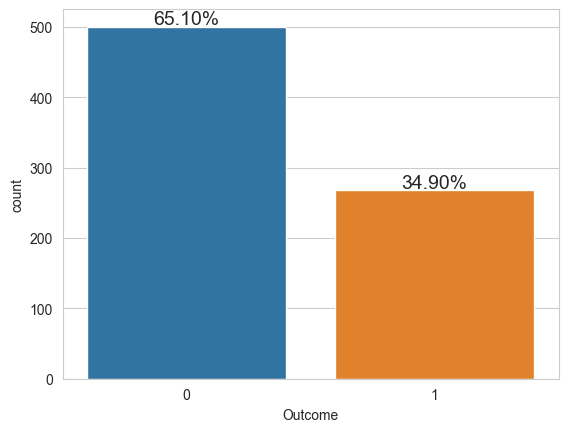

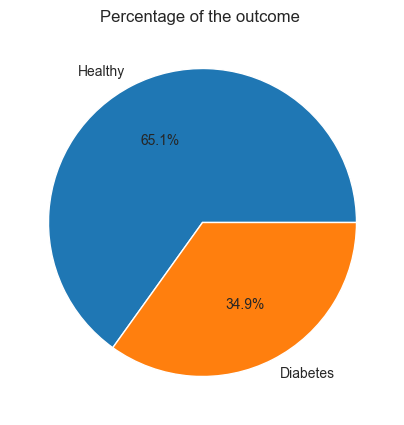

In [79]:
s = sns.countplot(x = 'Outcome',data = df)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(df)*100),
            ha="center", fontsize=14) 
    
#Pie chart that calculate the % of the outcome column
labels=['Healthy','Diabetes']

df1 = df['Outcome'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(df1, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of the outcome ')
plt.show()

Here:

    No: 65.1% Don't have diabetes.

    Yes: 34.9% Diabetes positive.

Note:The are 34.9% people has been dagnosed with diabetes and 65.1% of people that are negative result from diabetes
* The dataset is imbalanced 

Let's dig more deeper on the outcome column

The above bar chart explains the distributions of the number of femeles pregnancies that have occured in the above dataset.

This describes that the woman with 1 pregnancy  counts 135 cases in  the dataset, after women that never been pregnant with 111 counts, after 2 cases with 103 counts and more, last we have 1 count with 17 cases of pregnancies

In [80]:
#statistic descriptive
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Insight

We can see there few data for columns Glucose , Insulin, skin thickenss, BMI and Blood Pressure which have value as 0. That's not possible,right? you can do a quick search to see that one cannot have 0 values for these. Let's deal with that. we can either remove such data or simply replace it with their respective mean values. Let's do the latter.

### Looking for Correlations

Before proceeding with the data cleaning, it is useful to establish a correlation between the response variable (in our case the Outcome ) and other predictor variables, as some of them might not have any major impact in determining the the outcome. There are many ways to discover correlation between the target variable and the rest of the features. Building pair plots, scatter plots, heat maps, and a correlation matrixes are the most common ones. Below, we will use the corr() function to list the top features based on the pearson correlation coefficient (measures how closely two sequences of numbers are correlated). Correlation coefficient can only be calculated on the numerical attributes (floats and integers), therefore, only the numeric attributes will be selected.

In [81]:
#check for correlated columns
corr_matrix = df.corr(numeric_only=True)

corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

Descriptive analysis

In [82]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* There few error in BMI coloummn,  can not be zero, Blood Pressure can't be also zero, glucose, insuline can't be zero so lets try to fix it by replacing `zero` with `mean`  values

In [83]:
# now replacing zero with the mean values of the following columns

df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

Descriptive analysis

In [84]:
#Double check
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
SkinThickness,768.0,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
Insulin,768.0,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


Result:

There are 768 records in the dataset.

And the zero value from the columns Glucose, Insulin, skin thickness, BMI and Blood Pressure will be replace with the mean values. since it's impossible to have zero value from the above columns.

In [85]:
#drop Diabetes pedigree function column

df.drop(['DiabetesPedigreeFunction'], axis=1, inplace=True)
feature_cols = df.columns[:-1]


### pairplot

Linear regression needs the relationship between independent variable and the dependent variable to be linear. We can test this assumption with some scatter plots and regression lines. 

We will start with the 'enginesize' and 'horsepower' features.


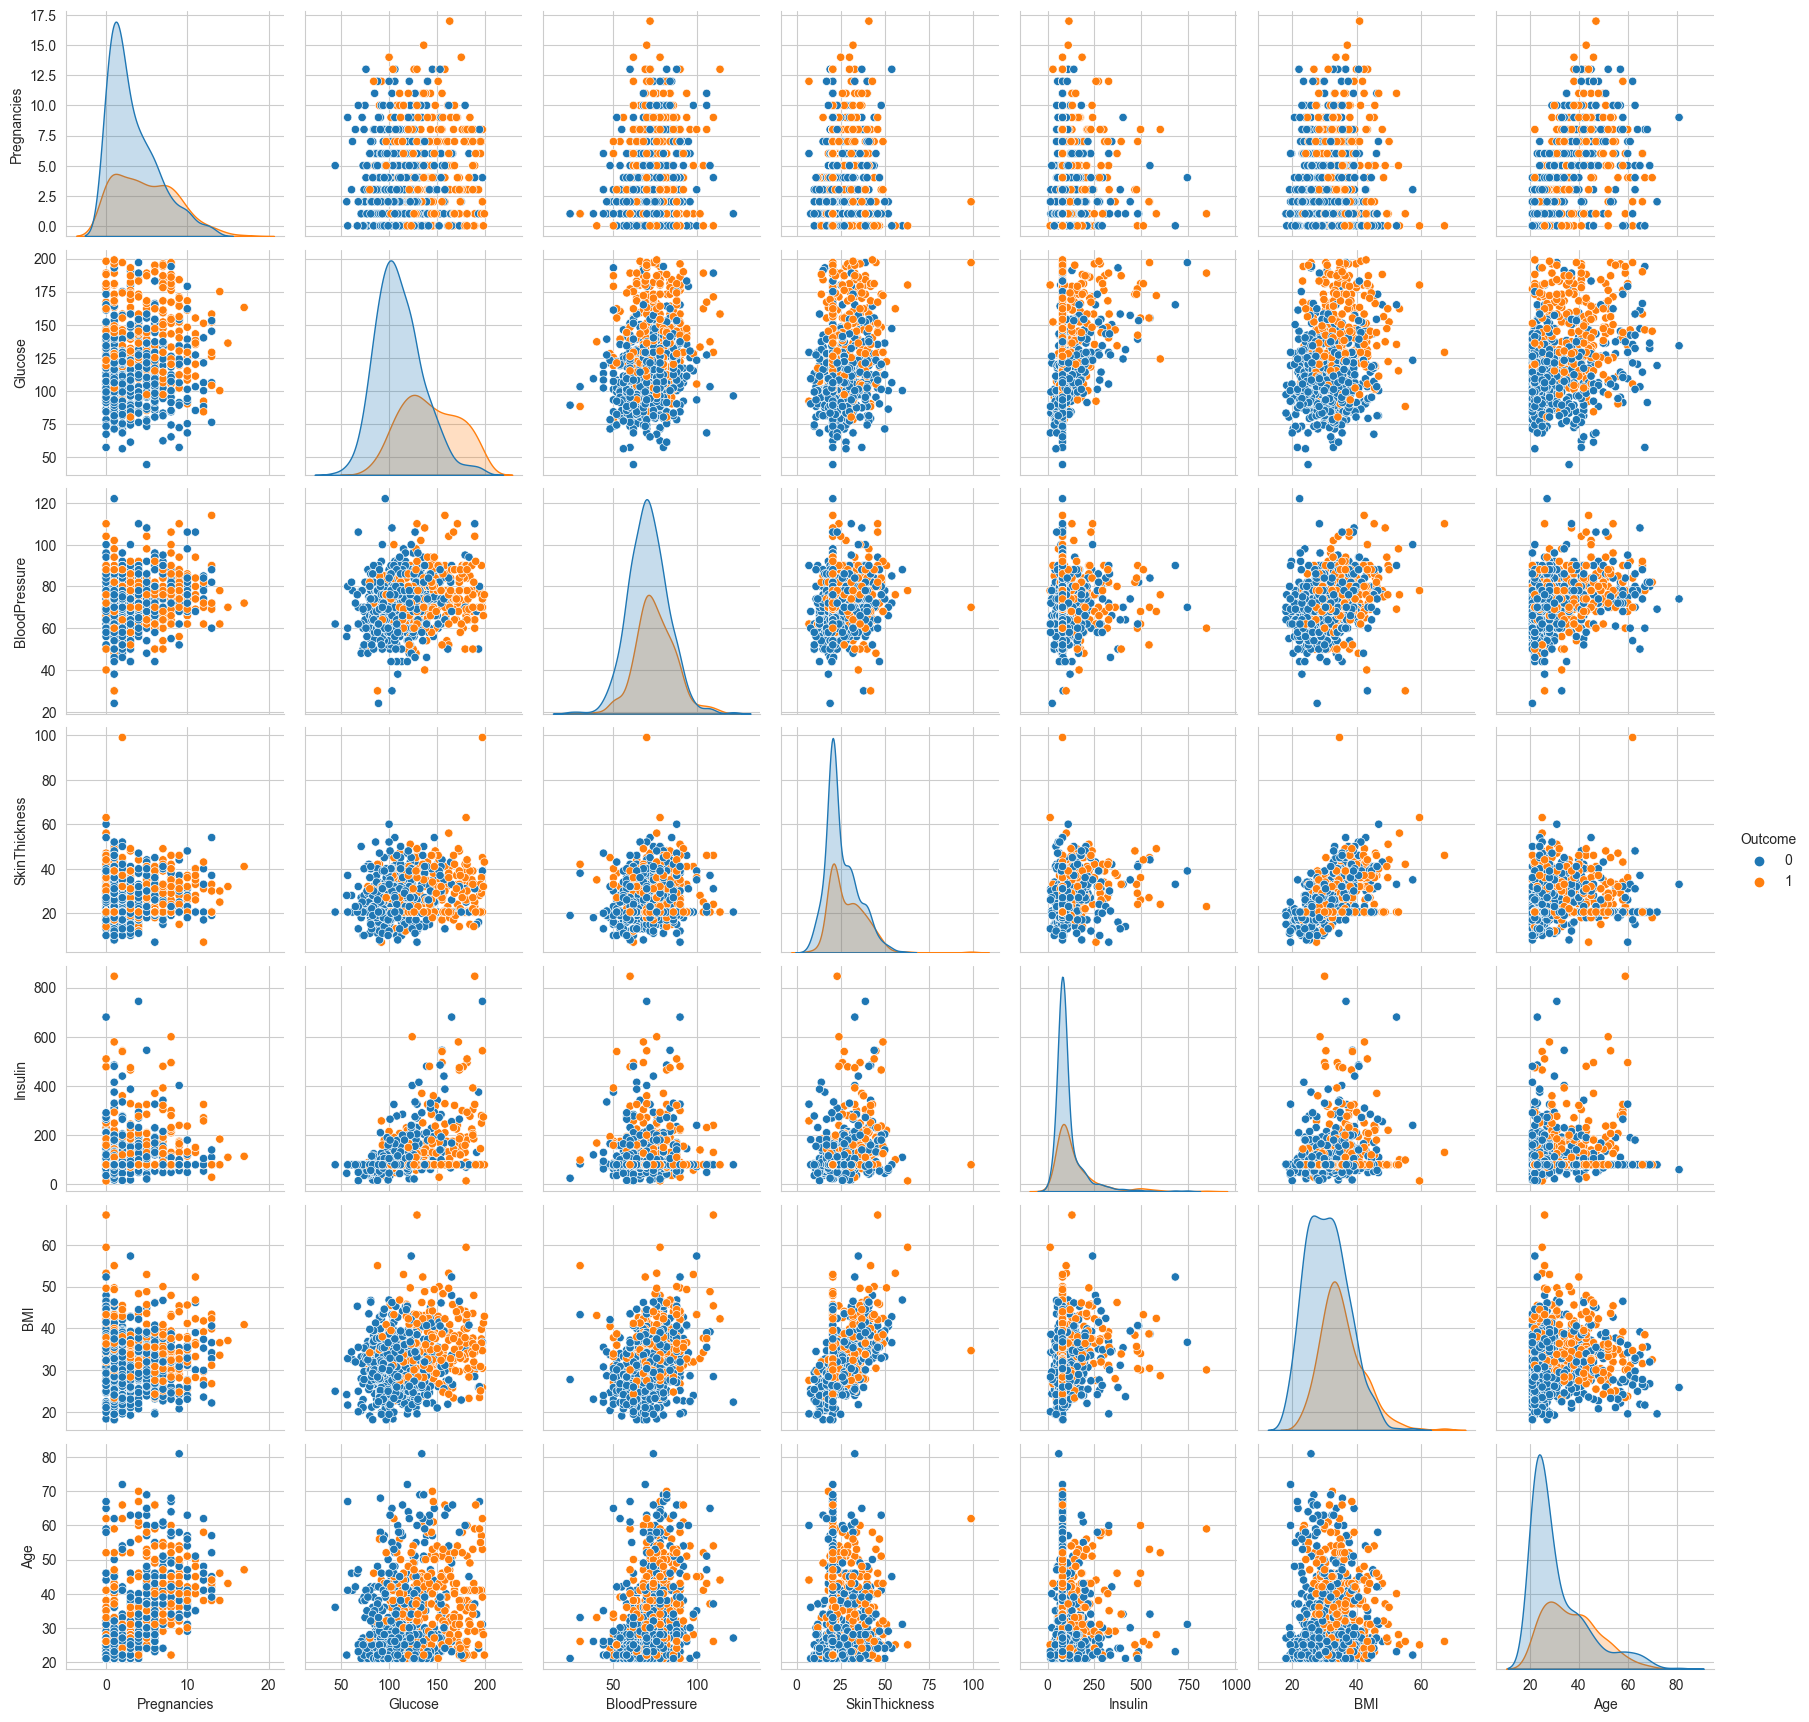

In [86]:
sns.pairplot(df, hue='Outcome')


# Histogram distribution of numeric column

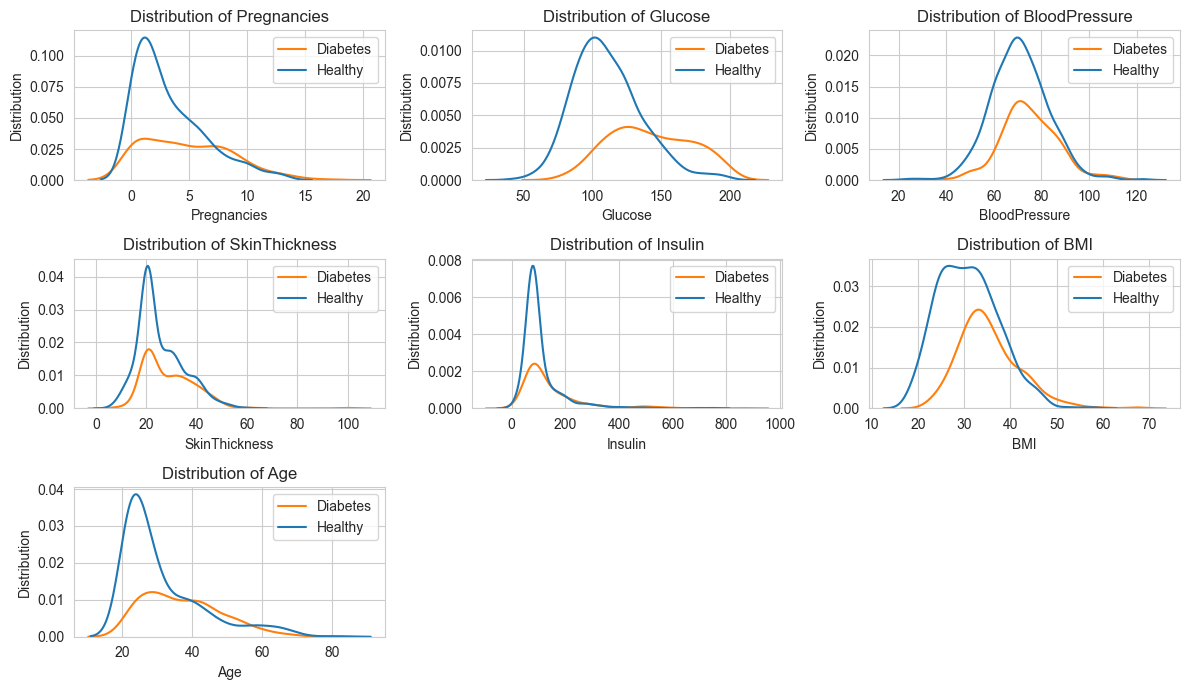

In [87]:
sns.set_style("whitegrid")

plt.figure(figsize=(12,7))
label=['Diabetes','Healthy']
for i, column in enumerate(df.columns[:-1],1):
    plt.subplot(3,3,i)
    sns.kdeplot(df, x=df[column],  hue="Outcome")
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Distribution')
    plt.legend(label)

plt.tight_layout()
plt.show()

Insight:

The above result shows the distribution of all the numeric features. The last color indicates the outcome target feature with either a diabetes patient or not a diabetes patient. Also, if we look closely at the graphic, the diabetes with the orange line seems to be slightly above the blue line at the end of the graph. From this,  we learn the more insulin, BMI, Glucose and so on. The is in a body, the more chance of diabetes


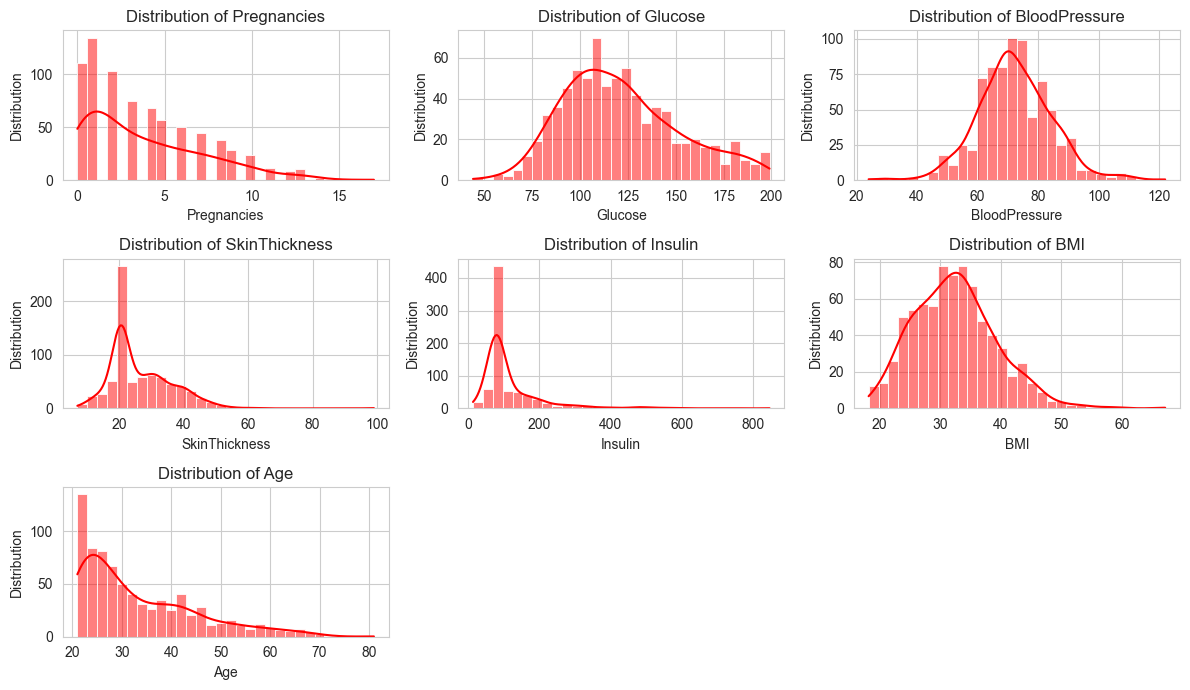

In [88]:
sns.set_style("whitegrid")

plt.figure(figsize=(12,7))
for i, column in enumerate(df.columns[:-1],1):
    plt.subplot(3,3,i)
    sns.histplot(df[column], bins=30, kde=True , color="red")
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Distribution')

plt.tight_layout()
plt.show()

### Log Transformation

We can also check statistically if the target is normally distributed, using `normaltest()` function. If the p-value is large (>0.05), the target variable is normally distributed.

Nomalize the data per column

### 3. Normality
The linear regression analysis requires the dependent variable, to be normally distributed. A histogram, box plot, or a Q-Q-Plot can check if the target variable is normally distributed. The goodness of fit test, e.g., the Kolmogorov-Smirnov test can check for normality in the dependent variable. [This documentation](https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411) contains more information on the normality assumption. 

Let's display all three charts to show how our target variable,  behaves.


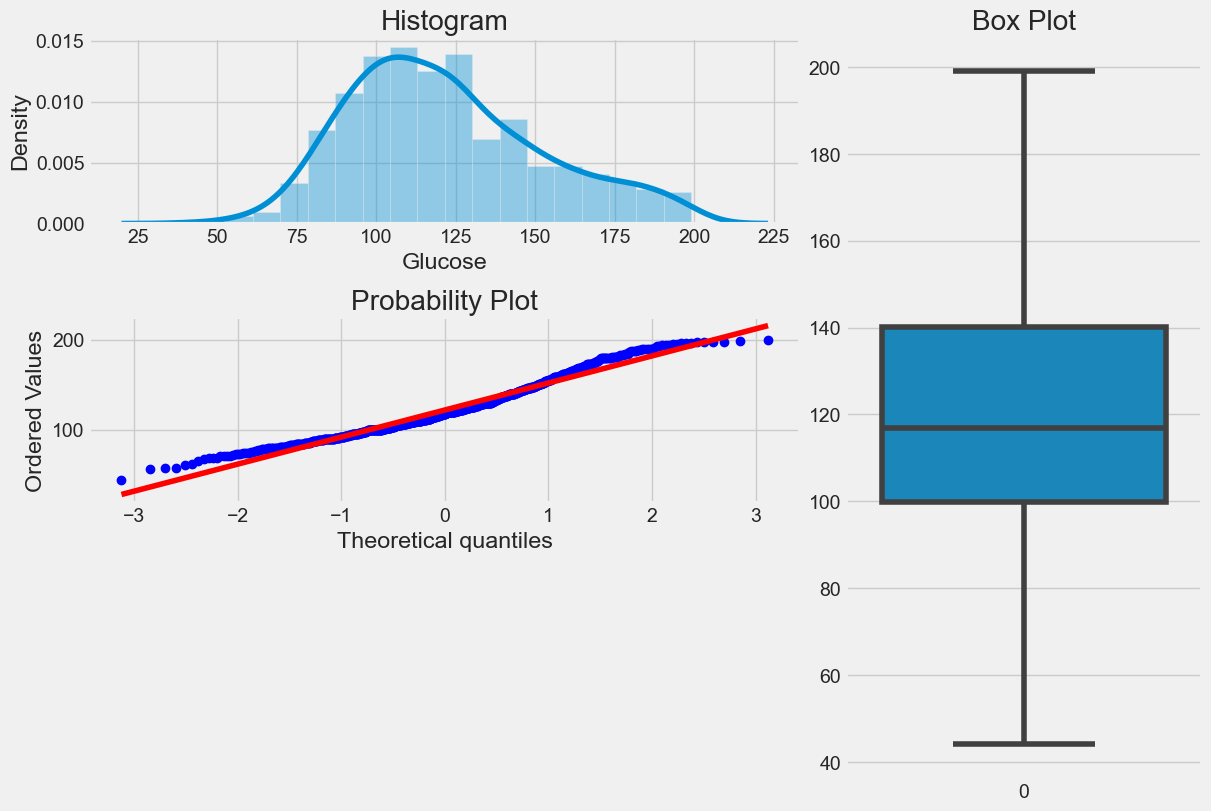

In [89]:
def plotting_3_chart(data, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(data.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(data.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(data.loc[:,feature], orient='v', ax = ax3);
    
plotting_3_chart(df, 'Glucose')

In [90]:
normaltest(df.Glucose.values)

NormaltestResult(statistic=35.37277779478811, pvalue=2.084005674046153e-08)

In [91]:
df['Glucose'] = np.log(df['Glucose'])
df['BMI'] = np.log(df['BMI'])
df['SkinThickness'] = np.log(df['SkinThickness'])
df['Insulin'] = np.log(df['Insulin'])
df['BloodPressure'] = np.log(df['BloodPressure'])
df['Age'] = np.log(df['Age'])

Histogram distribution

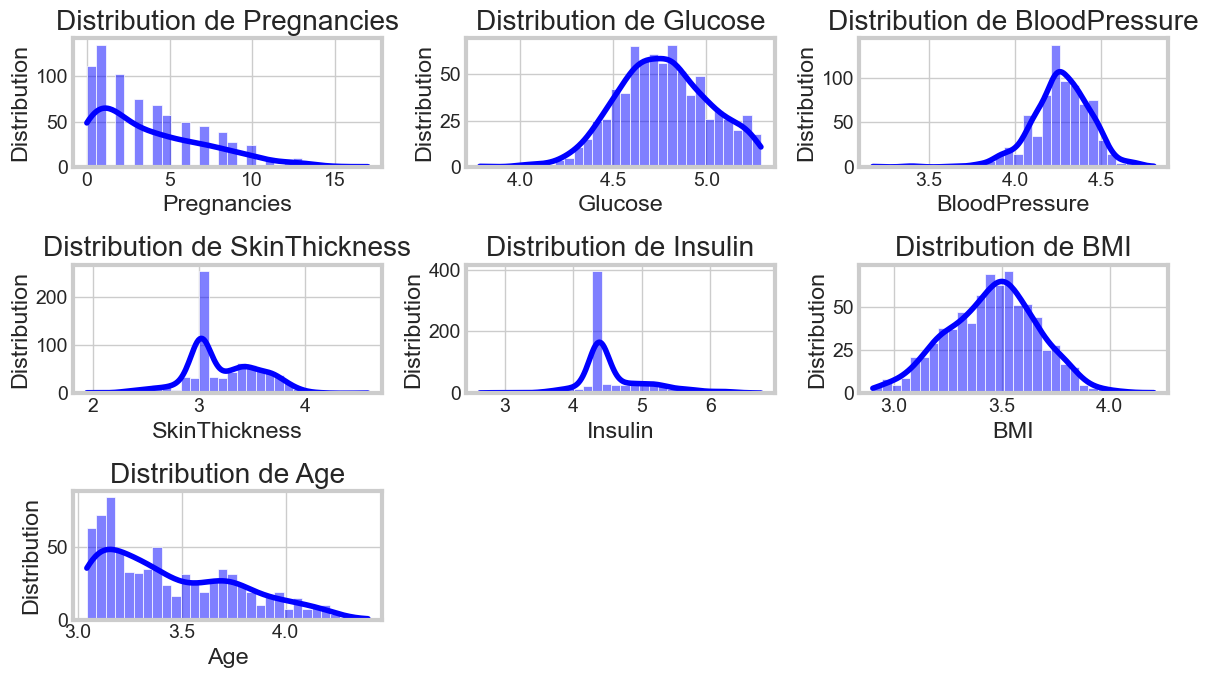

In [92]:
sns.set_style("whitegrid")

plt.figure(figsize=(12,7))
for i, column in enumerate(df.columns[:-1],1):
    plt.subplot(3,3,i)
    sns.histplot(df[column], bins=30, kde=True , color="blue")
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel('Distribution')

plt.tight_layout()
plt.show()

In [93]:
normaltest(df.Glucose.values)

NormaltestResult(statistic=1.3994618704602924, pvalue=0.49671893537885703)

As we can see, the p-value is very small, so it is not normally distributed.

Now, we can try to transform our data, so it looks more normally distributed. We can use the `np.log()` or `np.log1p`functions from the `numpy` library to perform the log transformation. The `np.log1p` works better with smaller numbers and thus provides more accurate results. This [documentation](https://numpy.org/doc/stable/reference/generated/numpy.log.html) contains more information about the numpy log transform.


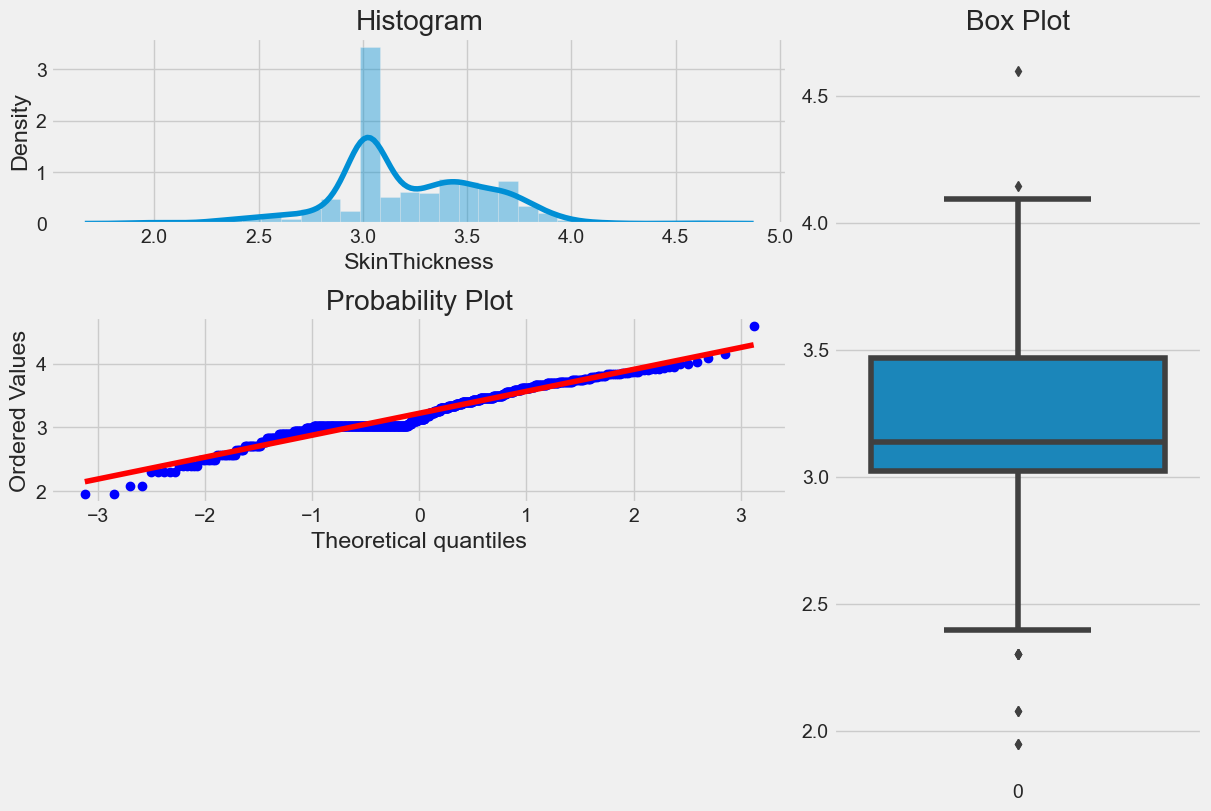

In [94]:

plotting_3_chart(df, 'SkinThickness')


In [95]:
normaltest(df.Glucose.values)

NormaltestResult(statistic=1.3994618704602924, pvalue=0.49671893537885703)

We can see from the above result the data has been normally distributed

# Correlation matrix

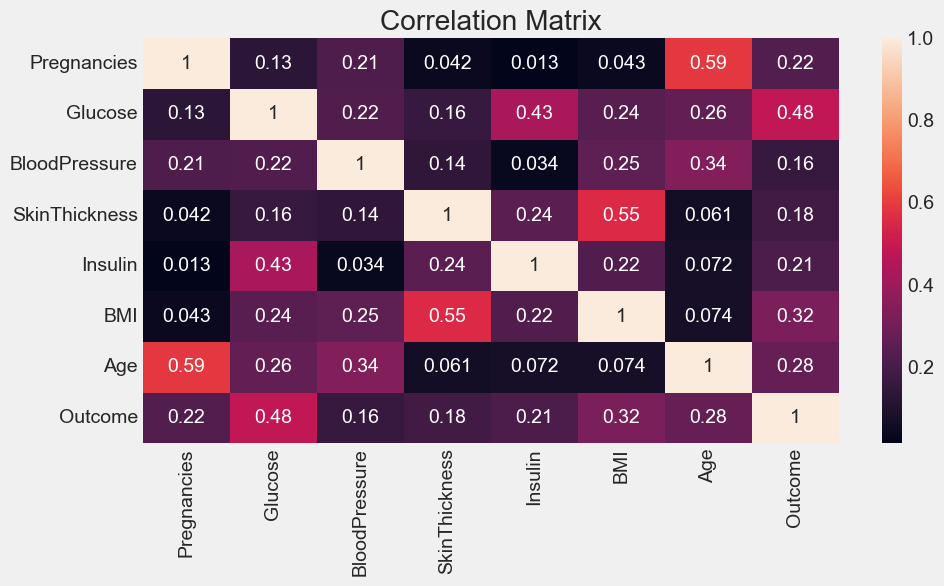

In [96]:
#Correlation coefficiant

plt.figure(figsize=(10,5))
data= df.corr()
sns.heatmap(data, annot=True)
plt.title("Correlation Matrix")
plt.show()


In [97]:
y = (df['Outcome'] == 1 ).astype(int)
fields = list(df.columns[:-1])
correlations = df[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

BloodPressure    0.158968
SkinThickness    0.183625
Insulin          0.211521
Pregnancies      0.221898
Age              0.275077
BMI              0.320871
Glucose          0.481892
dtype: float64

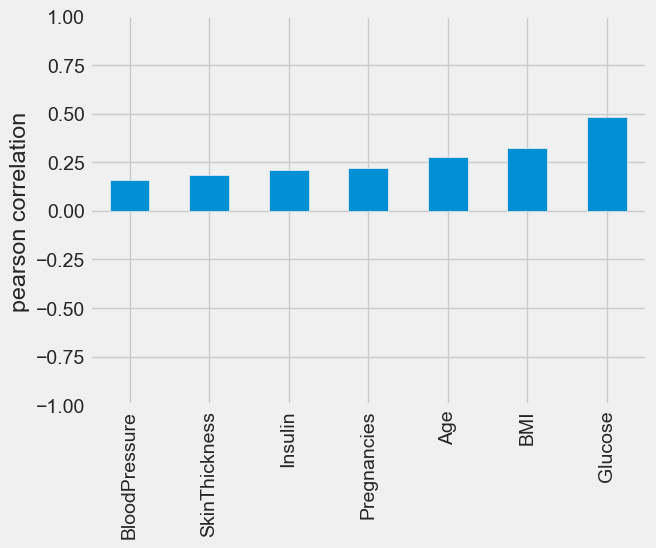

In [98]:
ax = correlations.plot(kind='bar')
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

Result

* Outcome has a moderate positive correlation with Glucose, which makes sense as glucose levels are a direct indicator of diabetes.

* Follow by Body mass index then Age







## Logistic Regression model

In [99]:
# Features and target
X= df.drop(columns=['Outcome'])
y = df['Outcome']

In [100]:
#from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 0)

We use `StratifiedShuffleSplit` seeing we unbaleced target coloumn, so the above funcion split the dataset in proportion

In [101]:
print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

Training dataset shape, X_train: (614, 7), y_train: (614,)
Testing dataset shape, X_test: (154, 7), y_test: (154,)


In [102]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [103]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
680,2,4.025352,4.025352,3.332205,3.806662,3.186353,3.091042
607,1,4.521789,4.127134,3.218876,3.713572,2.970414,3.218876
639,1,4.605170,4.304065,2.484907,3.828641,2.970414,3.332205
638,7,4.574711,4.330733,3.465736,4.510860,3.711130,3.465736
295,6,5.017280,4.127134,3.433987,4.787492,3.569533,3.332205
...,...,...,...,...,...,...,...
526,1,4.574711,4.158883,2.944439,4.406719,2.901422,3.044522
685,2,4.859812,4.304065,3.258097,5.323010,3.502550,3.218876
391,5,5.111988,4.330733,3.022202,4.379517,3.822098,3.295837
654,1,4.663439,4.248495,3.332205,4.905275,3.532226,3.091042


In [104]:
LR = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)

y_pred = LR.predict(X_test)

In [105]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
      dtype=int64)

In [106]:
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       100
           1       0.71      0.59      0.65        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154

Accuracy score:  0.77
F1 Score:  0.65


In [107]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       100
           1       0.66      0.54      0.59        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154

Accuracy score:  0.74
F1 Score:  0.59


Text(0.5, 41.583333333333286, 'Ground Truth')

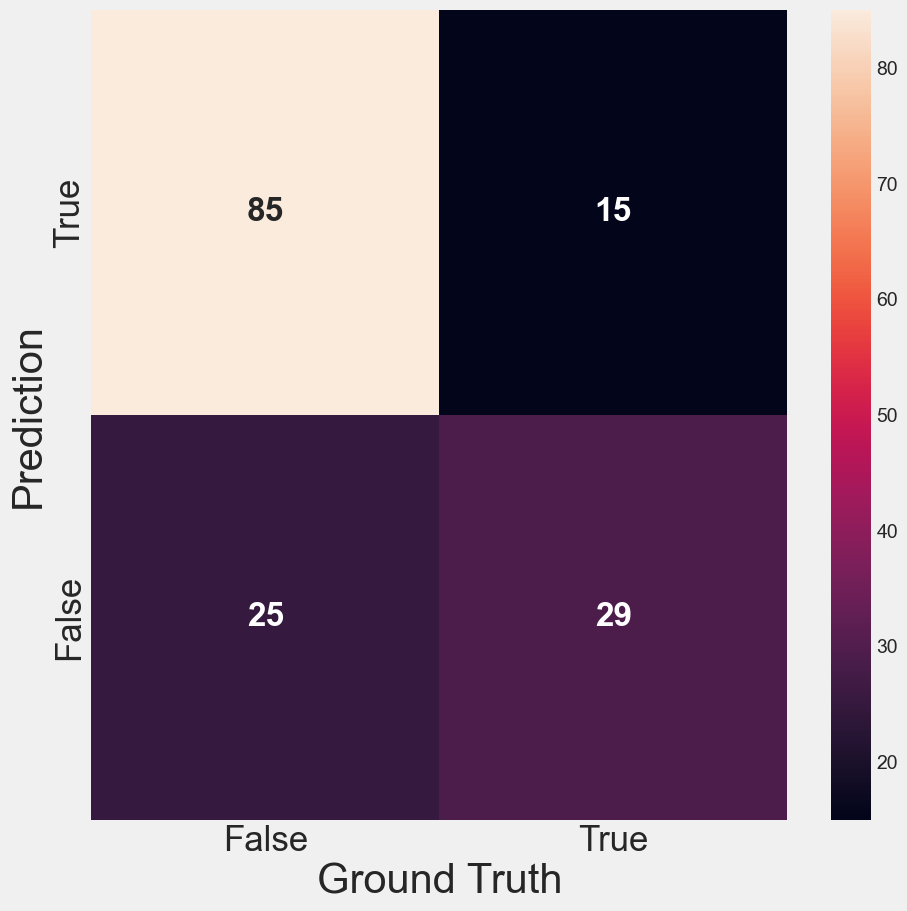

In [108]:
# Plot confusion matrix
_, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 24, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)
### END SOLUTION

* To determine the right value for K, examine results for values of K from 1 to 40.
* This time, focus on two measures, the F-1 Score, and the Error Rate (1-Accuracy).
* Generate charts which plot each of these measures as a function of K. 
* What do these charts suggest about the optimal value for K?

In [109]:
### BEGIN SOLUTION
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

<Figure size 1920x1440 with 0 Axes>

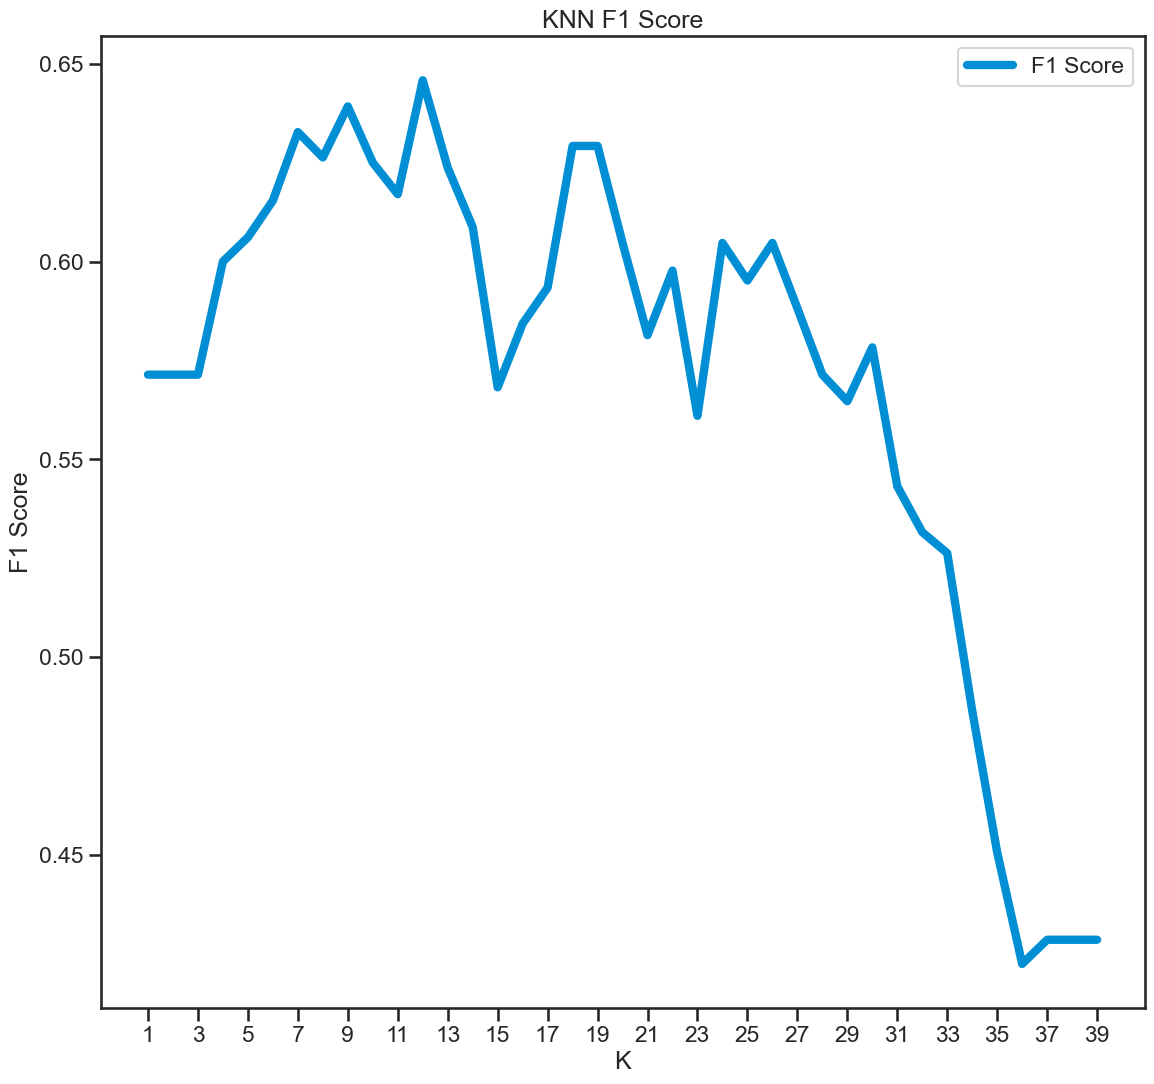

In [110]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
plt.savefig('knn_f1.png')

<Figure size 1920x1440 with 0 Axes>

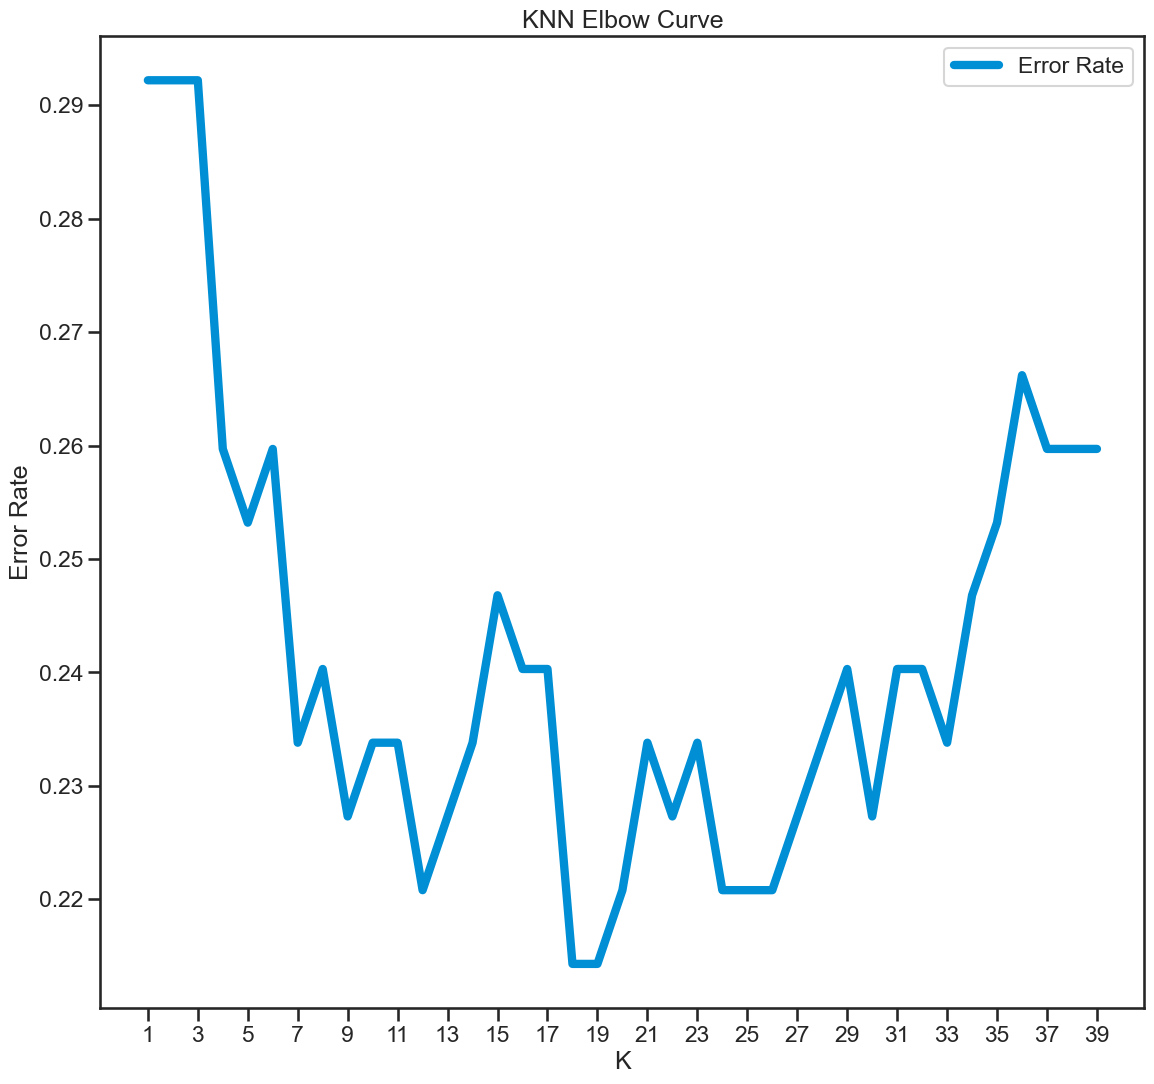

In [111]:
# Plot Accuracy (Error Rate) results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')
### END SOLUTION

## Decision tree model

* Fit a decision tree classifier with no set limits on maximum depth, features, or leaves.
* Determine how many nodes are present and what the depth of this (very large) tree is.
* Using this tree, measure the prediction error in the train and test data sets. What do you think is going on here based on the differences in prediction error?

In [112]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=123, max_depth=10,class_weight='balanced')
dt = dt.fit(X_train, y_train)

The number of nodes and the maximum actual depth.

In [113]:
dt.tree_.node_count, dt.tree_.max_depth

(183, 10)

A function to return error metrics.

In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_test, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_test, y_pred),
                      'precision': precision_score(y_test, y_pred),
                      'recall': recall_score(y_test, y_pred),
                      'f1': f1_score(y_test, y_pred)},
                      name=label)



In [115]:
# The error on the training and test data sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error


,train,test
accuracy,0.920195,0.746753
precision,0.823529,0.619048
recall,0.981308,0.722222
f1,0.895522,0.666667


In [116]:
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_train, y_train_pred))
print('Accuracy score: ', round(accuracy_score(y_train, y_train_pred), 2))
print('F1 Score: ', round(f1_score(y_train, y_train_pred), 2))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       400
           1       0.82      0.98      0.90       214

    accuracy                           0.92       614
   macro avg       0.91      0.93      0.92       614
weighted avg       0.93      0.92      0.92       614

Accuracy score:  0.92
F1 Score:  0.9


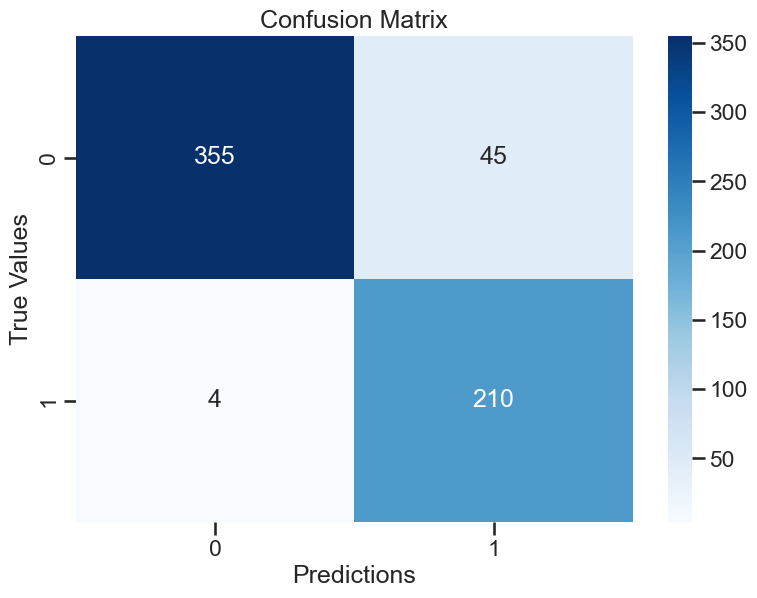

In [117]:
# Plot confusion matrix
cm = confusion_matrix(y_train,y_train_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.title('Confusion Matrix')
plt.show()

## Build a Predictive system base on train data

In [118]:
X_test.iloc[12:13]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
190,3,4.70953,4.127134,3.022202,4.379517,3.11795,3.044522


In [119]:
input_data = X_test.iloc[12:13]
knn = knn.fit(X_train, y_train)
#change the input data into numpy array
input_data_asnumpy_array = np.asanyarray(input_data)

#reshape the numpy array are we are insert new value for prediction
input_data_reshaped = input_data_asnumpy_array.reshape(1,-1)

prediction = dt.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print("Healthy patient")
else:
    print("Diabetes Patient")

[0]
Healthy patient
